<h1 style="text-align: center">
Foundations of DataScience </br>
</h1>
<h2 style="text-align: center">
Course Project </br>
Financial Analysis on Twitter
</h2>




<div class="box">
  <table>
    <tr>
      <th colspan="2">Personal Info</th>
    </tr>
    <tr>
      <td>First Name:</td>
      <td>Ali</td>
    </tr>
    <tr>
      <td>Last Name:</td>
      <td>Nikkhah</td>
    </tr>
    <tr>
      <td>Student Number:</td>
      <td>99102445</td>
    </tr>
    <tr>
      <td>Git:</td>
      <td><a href="https://github.com/AliNikkhah2001/DataScience02" target="_blank">https://github.com/AliNikkhah2001/DataScience02</a></td>
    </tr>
  </table>
</div>




<body>

<h2>Phase I</h2>

<table border="1">
  <tr>
    <th>Task</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>1</td>
    <td> <a id='LoadDataset'>Load and Preprocess dataset</a> </td>
  </tr>
  <tr>
    <td>2</td>
    <td><a id='P1'>Express information of least and most tweeted stocks by segmentation over companies based on tweets related to them</a></td>
  </tr>
  <tr>
    <td>3</td>
      <td><a id='P2'>Distribution of 5 stocks over time</a></td>
  </tr>
  <tr>
    <td>4</td>
      <td><a id='P3'>Distribution of all financial tweets over time</a></td>
  </tr>
  <tr>
    <td>5</td>
      <td><a id='P4'>Distribution of retweets per tweets that company mentioned on</a></td>
  </tr>
  <tr>
    <td>6</td>
      <td><a id='P5'>Most information of 2 stocks computed solely from financial dataset</a></td>
  </tr>
  <tr>
    <td>7</td>
      <td><a id='P6'>Movement directions of two stocks compared to real-world news</a></td>
  </tr>
  <tr>
    <td>8</td>
      <td><a id='P7'>Co-occurrence of stocks over tweets</a></td>
  </tr>
</table>

</body>
</html>


## Libraries installation and initialization

In [26]:
%%capture
!pip install --upgrade pip

In [27]:
%%capture
import zipfile
import urllib.request
import os
import pandas as pd
import pandas as pd
from tqdm import tqdm
import os
import urllib.request
import zipfile


<h3 id='LoadDataset'>Load and preprocess dataset</h3>

In [28]:
# Create a folder for the dataset if it doesn't exist
dataset_folder = 'dataset/P1'
os.makedirs(dataset_folder, exist_ok=True)

# List of dataset URLs
dataset_urls = [
    'https://zenodo.org/records/2686862/files/companies.csv.zip?download=1',
    'https://zenodo.org/records/2686862/files/entities.csv.zip?download=1',
    'https://zenodo.org/records/2686862/files/tweets.csv.zip?download=1',
    'https://zenodo.org/records/2686862/files/users.csv.zip?download=1'
]

# Download and extract each dataset with tqdm progress bar
for url in tqdm(dataset_urls, desc="Downloading and extracting datasets"):
    file_name = url.split('/')[-1].split('?')[0]
    zip_file_path = os.path.join(dataset_folder, file_name)
    csv_file_path = os.path.join(dataset_folder, file_name.replace('.zip', ''))

    # Download the zip file
    urllib.request.urlretrieve(url, zip_file_path)

    # Extract the contents of the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(csv_file_path)

    # Remove the zip file after extraction
    os.remove(zip_file_path)


In [29]:
dataset_files = ['companies.csv/companies', 'entities.csv/entities', 'tweets.csv/tweets']

# Create a list to store the DataFrames
dataframes = []

# Use tqdm to show progress bar while loading datasets
for file in tqdm(dataset_files, desc="Loading Datasets", unit="file"):
    file_path = os.path.join(dataset_folder, file + '.csv')
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Unpack the DataFrames
companies_df, entities_df, tweets_df = dataframes

Loading Datasets: 100%|██████████| 3/3 [01:13<00:00, 24.50s/file]


**We face several erros on parsing users dataframe. in the comming cells of the notebook, we try to solve this problem** 

In [30]:

print("\nInformation about the Companies DataFrame:")
print(companies_df.info())

print("\nInformation about the Entities DataFrame:")
print(entities_df.info())

print("\nInformation about the Tweets DataFrame:")
print(tweets_df.info())


Information about the Companies DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30032 entries, 0 to 30031
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ticker          30032 non-null  object 
 1   name            30032 non-null  object 
 2   exchange        30032 non-null  object 
 3   capitalization  22617 non-null  float64
dtypes: float64(1), object(3)
memory usage: 938.6+ KB
None

Information about the Entities DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36482461 entries, 0 to 36482460
Data columns (total 3 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   tweet_id     int64 
 1   entity_type  object
 2   text         object
dtypes: int64(1), object(2)
memory usage: 835.0+ MB
None

Information about the Tweets DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091539 entries, 0 to 9091538
Data columns (total 10 columns):
 #   Column               

In [31]:
def remove_zero_columns_rows(df):
    # Remove zero columns
    zero_columns_before = df.shape[1]
    df = df.loc[:, (df != 0).any(axis=0)]
    zero_columns_after = df.shape[1]

    # Remove zero rows
    zero_rows_before = df.shape[0]
    df = df.loc[(df != 0).any(axis=1)]
    zero_rows_after = df.shape[0]

    # Print the number of zero rows and columns deleted
    print(f"Number of zero columns deleted: {zero_columns_before - zero_columns_after}")
    print(f"Number of zero rows deleted: {zero_rows_before - zero_rows_after}")

    return df
companies_df = remove_zero_columns_rows(companies_df)
entities_df = remove_zero_columns_rows(entities_df)
tweets_df = remove_zero_columns_rows(tweets_df)


Number of zero columns deleted: 0
Number of zero rows deleted: 0
Number of zero columns deleted: 0
Number of zero rows deleted: 0
Number of zero columns deleted: 0
Number of zero rows deleted: 0


In [32]:
def remove_duplicates(df):
    # Count the number of duplicated rows before removal
    duplicates_before = df.duplicated().sum()

    # Remove duplicated rows
    df = df.drop_duplicates()

    # Count the number of duplicated rows after removal
    duplicates_after = df.duplicated().sum()

    # Print the number of removed duplicate rows
    print(f"Number of duplicated rows removed: {duplicates_before - duplicates_after}")

    return df

companies_df = remove_duplicates(companies_df)
entities_df = remove_duplicates(entities_df)
tweets_df = remove_duplicates(tweets_df)


Number of duplicated rows removed: 0
Number of duplicated rows removed: 0
Number of duplicated rows removed: 0


In [33]:
print("Companies DataFrame:")
random_company_sample = companies_df.sample(n=1)
print(random_company_sample.to_string(index=False))

# Print one random sample from tweets_df
print("\nTweets DataFrame:")
random_tweet_sample = tweets_df.sample(n=1)
print(random_tweet_sample.to_string(index=False))

# Print one random sample from entities_df
print("\nEntities DataFrame:")
random_entity_sample = entities_df.sample(n=1)
print(random_entity_sample.to_string(index=False))

Companies DataFrame:
ticker                 name exchange  capitalization
 BBVWF BBV VIETNAM S.E.A AC  OTCMKTS             NaN

Tweets DataFrame:
                id                                                                                                                   text    user_id  in_reply_to_status_id  in_reply_to_user_id  retweeted_status_id  retweeted_user_id lang                                                                               source                     created_at
904766840127332354 RT @Byakugancrypto: People who entered at ATHS for $MCO and $NEO lol #cryptocurrency $btc $eth https://t.co/s14Z42jcKR 3109004322                      0                    0   903731444794761216 893419627203710976   en <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a> Mon Sep 04 18:03:19 +0000 2017

Entities DataFrame:
          tweet_id entity_type text
897537168759021573      symbol  MDT


In [34]:
unique_entity_types = entities_df['entity_type'].unique()
print(unique_entity_types)

unique_entity_types = entities_df['entity_type'].unique()

# Create a dictionary to store one sample of each entity type
sample_entities = {}
sample_entity_size={}
# Iterate through unique entity types and find one sample for each
for entity_type in unique_entity_types:
    # Find one sample for the current entity type
    sample = entities_df[entities_df['entity_type'] == entity_type]
    sample_entities[entity_type] = sample.iloc[0]
    sample_entity_size[entity_type] = len(sample)

# Print one sample of each entity type
for entity_type, sample in sample_entities.items():
    print(f"Entity Type: {entity_type}")
    print(sample)
    print("\n")  # Separating each sample for better readability


['url' 'symbol' 'hashtag' 'mention' 'image' 'animated_gif' 'video']
Entity Type: url
tweet_id                                      865191269030612992
entity_type                                                  url
text           http://ih.advfn.com/p.php?pid=nmona&article=74...
Name: 0, dtype: object


Entity Type: symbol
tweet_id       865191269030612992
entity_type                symbol
text                         AMGN
Name: 1, dtype: object


Entity Type: hashtag
tweet_id       865191271899570176
entity_type               hashtag
text                          FDA
Name: 3, dtype: object


Entity Type: mention
tweet_id       865191407400693760
entity_type               mention
text               philstockworld
Name: 40, dtype: object


Entity Type: image
tweet_id                                   865191784741167104
entity_type                                             image
text           http://pbs.twimg.com/media/DAE33JSV0AAEbyt.jpg
Name: 232, dtype: object


Entity Type: animat

<h2 id='P1'> Statistics on most and least tweeted stocks. Perform segmentation of the companies based on the number of tweets they have. Provide relevant visualizations.</h2>

In [37]:
%%capture
!pip install tqdm

> The dataset is way too big, so even by some optimizations it is impossible to search Tickers this way (it takes 200 Hours to search for tickers) so i used another approach.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tqdm import tqdm  # Import tqdm library

# Assuming companies_df and entities_df are defined with the mentioned columns

# Filter entities_df where 'entity_type' is 'symbol' and 'text' is not NaN
symbol_entities = entities_df[(entities_df['entity_type'] == 'symbol') & entities_df['text'].notnull()]

# Initialize a dictionary to store ticker frequencies
ticker_freq = {}
print(len(companies_df['ticker']))
print(len(symbol_entities))


30032
19451634


In [42]:
import pandas as pd
from tqdm import tqdm  # Import tqdm library

# Assuming 'symbol_entities' DataFrame is defined

# Initialize a dictionary to store ticker frequencies
ticker_freq = {}

# Use tqdm to track progress
for _, row in tqdm(symbol_entities.iterrows(), total=len(symbol_entities), desc='Processing Symbol Entities'):
    ticker = row['text']
    if ticker not in ticker_freq:
        ticker_freq[ticker] = 1
    else:
        ticker_freq[ticker] += 1

# Convert ticker frequencies to a DataFrame
ticker_frequency = pd.DataFrame(ticker_freq.items(), columns=['Ticker', 'Frequency'])


Processing Symbol Entities: 100%|██████████| 19451634/19451634 [21:54<00:00, 14795.84it/s]


In [43]:
# Save ticker_frequency DataFrame to a CSV file
ticker_frequency.to_csv('ticker_frequency.csv', index=False)


In [44]:
import pandas as pd

# Load the 'ticker_frequency.csv' file into a DataFrame
#dataset = pd.read_csv('../input/ticker_frequency.csv')

# Display the loaded dataset
#print(dataset)


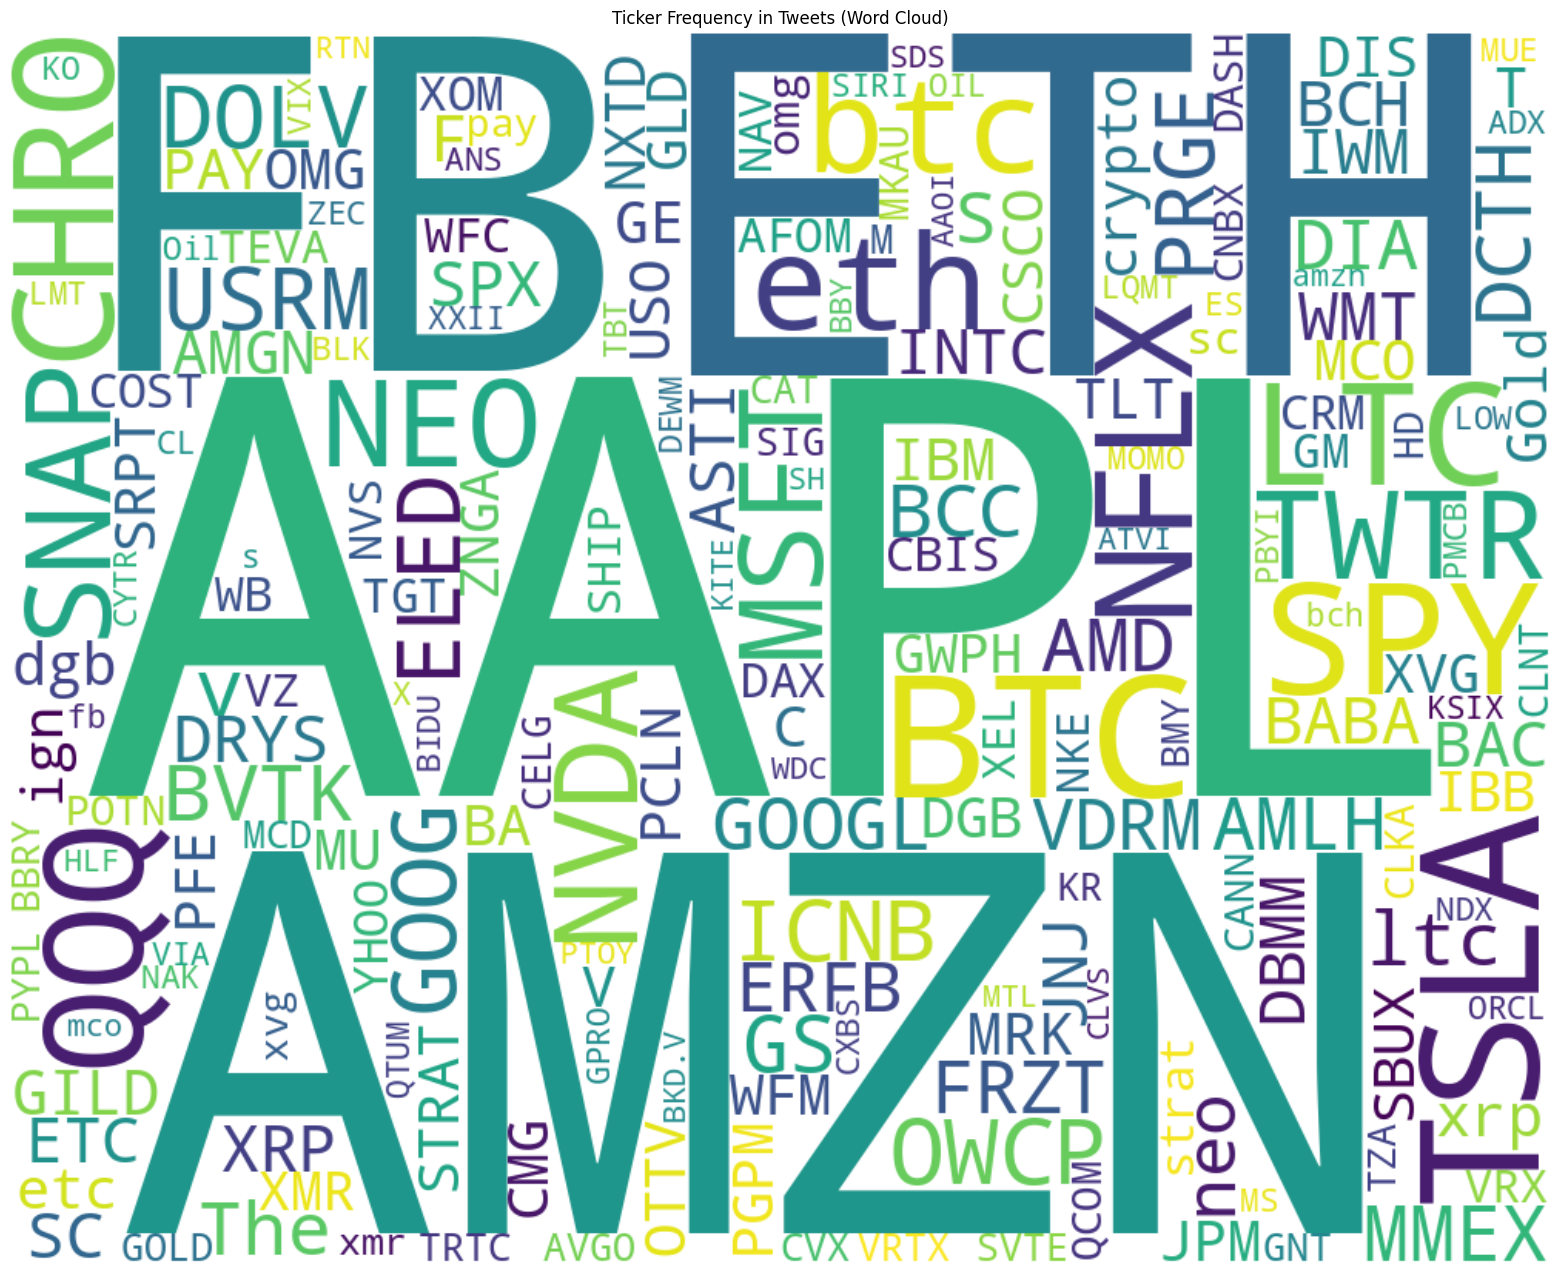

In [96]:

# Create a WordCloud to visualize ticker frequency as a word cloud
wordcloud = WordCloud(width=1000, height=800, background_color='white').generate_from_frequencies(dict(zip(ticker_frequency['Ticker'], ticker_frequency['Frequency'])))

plt.figure(figsize=(20, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ticker Frequency in Tweets (Word Cloud)')
plt.show()


In [119]:
import plotly.express as px

# Assuming ticker_frequency DataFrame is defined

# Calculate the total sum of frequencies
total_freq = ticker_frequency['Frequency'].sum()

# Calculate percentages for all ticker frequencies
ticker_frequency['Percentage'] = (ticker_frequency['Frequency'] / total_freq) * 100

# Filter ticker frequencies above 0.6% of the total
filtered_ticker_frequency = ticker_frequency[ticker_frequency['Percentage'] > 0.6]

# Calculate the total frequency of tickers above 0.6%
total_filtered_freq = filtered_ticker_frequency['Frequency'].sum()

# Calculate the frequency of 'Others'
other_freq = total_freq - total_filtered_freq

# Create a DataFrame for 'Others'
others = pd.DataFrame({'Ticker': ['Others'], 'Frequency': [other_freq], 'Percentage': [100 - filtered_ticker_frequency['Percentage'].sum()]})

# Concatenate the filtered tickers and 'Others' DataFrame
filtered_ticker_frequency = pd.concat([filtered_ticker_frequency, others])

# Plotting the pie chart using Plotly
fig = px.pie(filtered_ticker_frequency, values='Frequency', names='Ticker', title='Ticker Frequency Distribution')
fig.show()


In [118]:
import plotly.express as px

# Assuming ticker_frequency DataFrame is defined

# Calculate the total sum of frequencies
total_freq = ticker_frequency['Frequency'].sum()

# Calculate percentages for all ticker frequencies
ticker_frequency['Percentage'] = (ticker_frequency['Frequency'] / total_freq) * 100

# Filter ticker frequencies above 0.6% of the total and not equal to 'Others'
filtered_ticker_frequency = ticker_frequency[(ticker_frequency['Percentage'] > 0.6) & (ticker_frequency['Ticker'] != 'Others')]

# Plotting the pie chart for tickers other than 'Others' using plotly
fig = px.pie(filtered_ticker_frequency, values='Frequency', names='Ticker', title='Ticker Frequency Distribution (Excluding "Others")')

# Show the plot
fig.show()


<h2 id='P2'> Statistics on distributions of 5 individual stocks over time. Choose the individual stocks to perform reflect different sectors of the economy.</h2>



1. **Create a Dataset of Companies with Ticker Share > 0.8%:**
   - Use the `ticker_frequency` DataFrame 
   - Filter the DataFrame to include only tickers with a share larger than 8%.
   - Create a new DataFrame containing these companies' tickers.

2. **Search `entities_df['text']` for Rows Where `entities_df['entity_type'] == 'symbol'`:**
   - Filter `entities_df` to contain rows where `entity_type` is 'symbol'.
   - Use the resulting DataFrame to find corresponding tweets in `tweets_df` by matching `tweet_id` and `id` columns.

3. **Plot Distribution of Tweets vs Time by `tweets_df['created_at']`:**
   -  convert the `created_at` column to a `datetime` 
   - Plot the distribution of tweets over time.




In [52]:
!pip install tqdm
from tqdm import tqdm


     Ticker  Frequency  Percentage
13     AAPL     288037    1.480786
18       FB     211286    1.086212
42     TSLA     184441    0.948203
89     AMZN     237207    1.219471
192     SPY     160087    0.823000
1523    ETH     220754    1.134887
1568    BTC     194140    0.998065


Plotting Ticker Distribution: 100%|██████████| 7/7 [00:43<00:00,  6.24s/it]


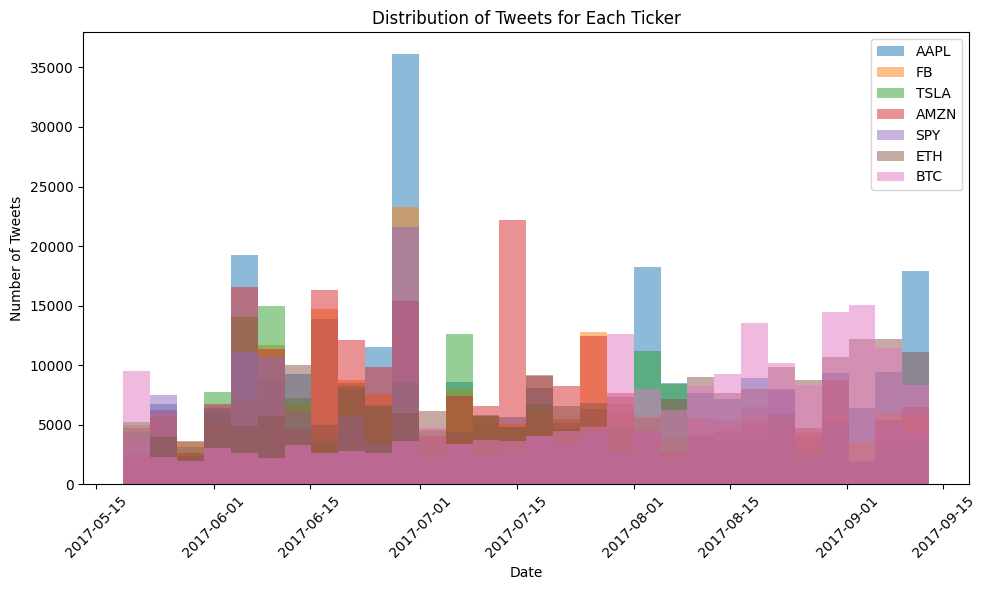

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
# Step 1: Create Dataset of Companies with Ticker Share > 8%
companies_gt_8_percent = ticker_frequency[ticker_frequency['Frequency'] > 0.008 * ticker_frequency['Frequency'].sum()]
print(companies_gt_8_percent)
# Initialize a dictionary to store data for each ticker
ticker_data = {}

# Step 2: Search entities_df['text'] for Rows Where entities_df['entity_type'] == 'symbol'
symbol_entities = entities_df[entities_df['entity_type'] == 'symbol']

# Step 3: Plot Distribution of Tweets for Each Ticker with a Separate Color
# Iterate through each ticker in tqdm progress bar
for ticker in tqdm(companies_gt_8_percent['Ticker'], desc='Plotting Ticker Distribution'):
    # Filter symbol_entities for the current ticker
    filtered_entities = symbol_entities[symbol_entities['text'] == ticker]
    
    # Merge filtered entities with tweets_df to find corresponding tweets
    merged_df = pd.merge(filtered_entities, tweets_df, left_on='tweet_id', right_on='id', how='inner')
    
    # Convert 'created_at' column to datetime format
    merged_df['created_at'] = pd.to_datetime(merged_df['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')
    
    # Store data for the ticker
    ticker_data[ticker] = merged_df['created_at']
    
# Plot distribution of tweets for each ticker with a separate color
plt.figure(figsize=(10, 6))
for ticker, data in ticker_data.items():
    plt.hist(data, bins=30, alpha=0.5, label=ticker)

plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Tweets for Each Ticker')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Assuming ticker_frequency, entities_df, and tweets_df DataFrames are defined

# Step 1: Create Dataset of Companies with Ticker Share > 8%
companies_gt_8_percent = ticker_frequency[ticker_frequency['Frequency'] > 0.008 * ticker_frequency['Frequency'].sum()]

# Initialize a list to store tweet counts per ticker
tweet_counts_per_ticker = []

# Step 2: Search entities_df['text'] for Rows Where entities_df['entity_type'] == 'symbol'
symbol_entities = entities_df[entities_df['entity_type'] == 'symbol']

# Step 3: Collect Data for Each Ticker
# Iterate through each ticker in tqdm progress bar
for ticker in tqdm(companies_gt_8_percent['Ticker'], desc='Collecting Data'):
    # Filter symbol_entities for the current ticker
    filtered_entities = symbol_entities[symbol_entities['text'] == ticker]
    
    # Merge filtered entities with tweets_df to find corresponding tweets
    merged_df = pd.merge(filtered_entities, tweets_df, left_on='tweet_id', right_on='id', how='inner')
    
    # Convert 'created_at' column to datetime format
    merged_df['created_at'] = pd.to_datetime(merged_df['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')
    
    # Count the number of tweets for the current ticker
    tweet_counts_per_ticker.append(merged_df.groupby(merged_df['created_at'].dt.date).size())

# Convert the list of tweet counts per ticker into a DataFrame
df_tweet_counts_per_ticker = pd.DataFrame(tweet_counts_per_ticker, index=companies_gt_8_percent['Ticker'])



In [120]:
import plotly.express as px
import pandas as pd

# Assuming df_tweet_counts_per_ticker DataFrame is defined

# Transpose the DataFrame for plotting
df_tweet_counts_per_ticker_transposed = df_tweet_counts_per_ticker.transpose()

# Create a stacked bar chart using Plotly
fig = px.bar(df_tweet_counts_per_ticker_transposed, barmode='stack')

# Customize the layout
fig.update_layout(
    title='Stacked Bar Chart: Distribution of Tweets for Each Ticker',
    xaxis_title='Date',
    yaxis_title='Number of Tweets',
    xaxis=dict(tickangle=45),
    legend=dict(title='Ticker', x=1, y=1.2)
)

# Hide x-axis ticks
fig.update_xaxes(showticklabels=False)

# Show the plot
fig.show()


<h2 id='P3'>Statistics on distributions of all financial tweets over time.</h2>

In [124]:
import plotly.express as px

# Assuming tweets_df DataFrame is defined

# Convert 'created_at' column to datetime format
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

# Group tweets by date and count the number of tweets per day
tweet_counts_per_day = tweets_df.groupby(tweets_df['created_at'].dt.date).size().reset_index(name='Number of Tweets')

# Plot distribution of all tweets over time using Plotly
fig = px.line(tweet_counts_per_day, x='created_at', y='Number of Tweets', title='Distribution of All Tweets Over Time')
fig.update_xaxes(title='Date', tickangle=45)
fig.update_yaxes(title='Number of Tweets')
fig.show()


In [127]:
import pandas as pd
import plotly.express as px

# Assuming tweets_df DataFrame is defined

# Convert 'created_at' column to datetime format
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

# Group tweets by date and count the number of tweets per day
tweet_counts_per_day = tweets_df.groupby(tweets_df['created_at'].dt.date).size().reset_index(name='Number of Tweets')

# Use Plotly to create a histogram with 10 bins
fig = px.histogram(tweet_counts_per_day, x='created_at', y='Number of Tweets', nbins=10,
                   labels={'created_at': 'Date', 'Number of Tweets': 'Number of Tweets'},
                   title='Number of Total Tweets vs Time (10 Bins)')
fig.update_layout(xaxis=dict(tickangle=45))
fig.show()


<h2 id='P4'>Statistics on distributions of retweets per tweets including individual stocks (at least 2 chosen stocks) over time.</h2>

In [128]:
import pandas as pd
from tqdm import tqdm

# Assuming tweets_df DataFrame is defined

# Create an empty list to store retweeted tweets
retweeted_tweets = []

# Filter retweeted tweets using tqdm
for index, row in tqdm(tweets_df.iterrows(), total=len(tweets_df), desc="Filtering Retweeted Tweets"):
    if row['retweeted_user_id'] != 0:
        retweeted_tweets.append(row)

# Create a new DataFrame from retweeted tweets
retweeted_tweets_df = pd.DataFrame(retweeted_tweets)

# Display the new DataFrame of retweeted tweets
print(retweeted_tweets_df)


Filtering Retweeted Tweets: 100%|██████████| 9091539/9091539 [10:47<00:00, 14042.04it/s] 


                         id  \
0        865326129644797957   
7        865326138205368320   
11       865326150205284353   
13       865326157968834563   
14       865326159549968389   
...                     ...   
9091492  907725316436758528   
9091507  907725347130572800   
9091517  907725416349224960   
9091519  907725420417740800   
9091528  907725455217745920   

                                                      text  \
0        RT @cruzfloresiv: To all the weak hands who so...   
7            RT @djdsk3000: $ltc it's about that time #LTC   
11       RT @bapao83: Enough said $ltc https://t.co/dnE...   
13                          RT @AceCrypto: $LTC ????!!!!!!   
14       RT @whotrades: Why Ascena Retail Group, Arcos ...   
...                                                    ...   
9091492  RT @theflynews: Micron upgraded to Buy from Ne...   
9091507  RT @gkariopp: .  $MU Citigroup Inc. Reaffirms ...   
9091517  RT @turco_hernan: $PGR #PGR ???? https://t.co/...   
9091519

In [135]:
import pandas as pd
from tqdm import tqdm
import plotly.express as px

# Assuming retweeted_tweets_df DataFrame is defined

# List of valid stock symbols
valid_symbols = ['AAPL', 'GOOG', 'GOOGL', 'FB', 'AMZN']

# Create an empty DataFrame to store the required data
symbol_data = {'Last_Word': [], 'Created_At': []}

# Iterate through each row in retweeted_tweets_df using tqdm
for index, row in tqdm(retweeted_tweets_df.iterrows(), total=len(retweeted_tweets_df), desc="Processing Retweeted Tweets"):
    # Split the text by spaces and find words after a dollar sign ('$')
    words_after_dollar = [word.strip().upper() if word.strip().lower() in valid_symbols else None for word in row['text'].split('$')[1:]]
    words_after_dollar = list(filter(None, words_after_dollar))
    
    # Store the last words and corresponding created_at timestamp in the DataFrame
    if words_after_dollar:
        last_word = words_after_dollar[-1]
        symbol_data['Last_Word'].append(last_word)
        symbol_data['Created_At'].append(row['created_at'])

# Create a DataFrame from the collected symbol data
symbol_data_df = pd.DataFrame(symbol_data)
print(symbol_data_df)
# Plot distribution of each name vs time using Plotly
fig = px.histogram(symbol_data_df, x='Created_At', color='Last_Word', title='Distribution of Last Words vs Time')
fig.show()


Processing Retweeted Tweets:   9%|▊         | 192029/2205802 [00:17<03:08, 10704.50it/s]


KeyboardInterrupt: 

<h2 id='P5'>Statistics on most important financial information on individual stocks (at least 2 chosen stocks) computed solely from the financial information (not tweets).</h2>

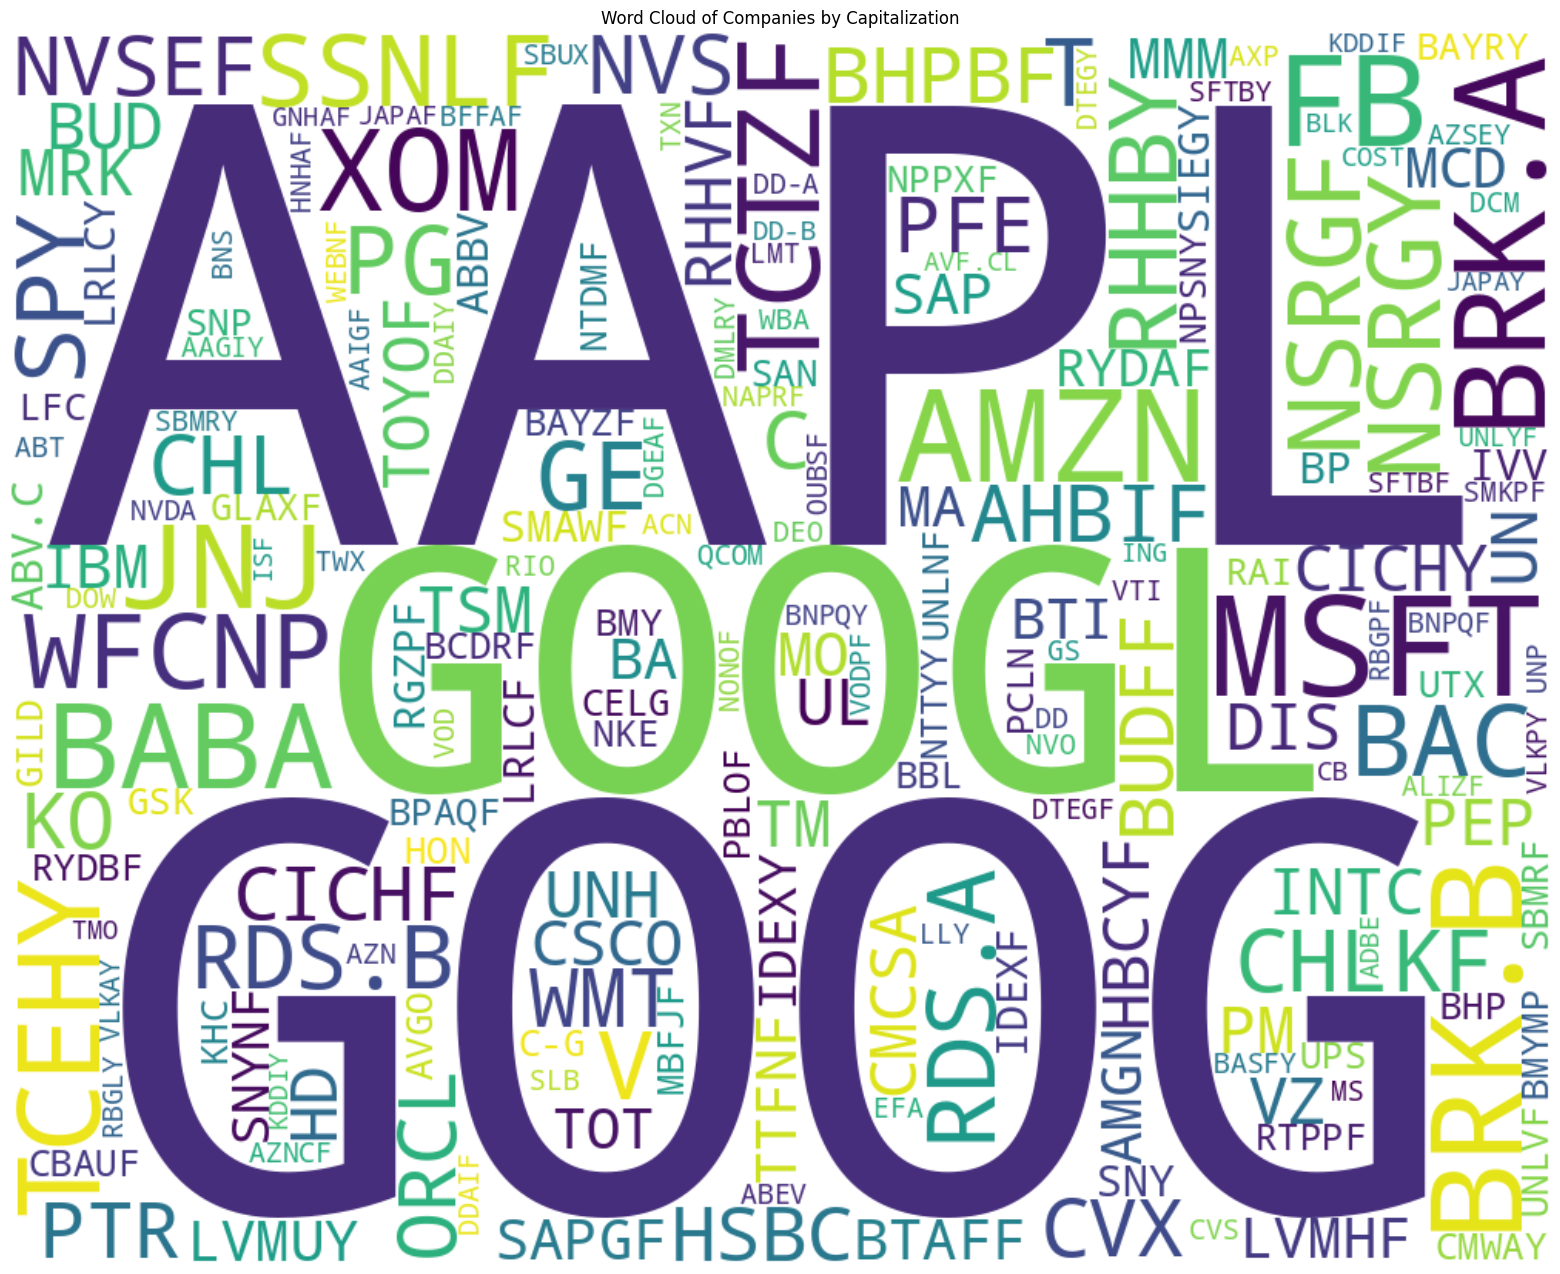

In [98]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming companies_df is your DataFrame containing 'ticker' and 'capitalization' columns
# Sort companies by 'capitalization'
sorted_companies = companies_df.sort_values(by='capitalization', ascending=False)

# Create a dictionary with ticker symbols as keys and corresponding capitalization values
ticker_capitalization = dict(zip(sorted_companies['ticker'], sorted_companies['capitalization']))

# Generate the word cloud with ticker size proportional to capitalization
wordcloud = WordCloud(width=1000, height=800, background_color='white').generate_from_frequencies(ticker_capitalization)

# Plot the word cloud
plt.figure(figsize=(20, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Companies by Capitalization')
plt.show()


In [123]:
import plotly.express as px

# Assuming companies_df is your DataFrame containing 'ticker' and 'capitalization' columns

# Calculate the total capitalization
total_capitalization = companies_df['capitalization'].sum()

# Sort companies by 'capitalization'
sorted_companies = companies_df.sort_values(by='capitalization', ascending=False)

# Calculate the percentage of each company's capitalization relative to the total capitalization
sorted_companies['percentage'] = (sorted_companies['capitalization'] / total_capitalization) * 100

# Create a pie chart for companies with more than 0.6% and 'Others'
over_six_tenths_percent = sorted_companies[sorted_companies['percentage'] > 0.6]
others = sorted_companies[sorted_companies['percentage'] <= 0.6]

# Calculate the total capitalization of companies over 0.6% and 'Others'
total_over_six_tenths_percent = over_six_tenths_percent['capitalization'].sum()
total_others = others['capitalization'].sum()

# Create a list containing companies over 0.6% and 'Others'
companies = list(over_six_tenths_percent['ticker'])
companies.append('Others')

# Create a list containing capitalization values for companies over 0.6% and 'Others'
capitalizations = list(over_six_tenths_percent['capitalization'])
capitalizations.append(total_others)

# Plot the pie chart for companies over 0.6% and 'Others'
fig = px.pie(values=capitalizations, names=companies, title='Capitalization Distribution over 0.6% and Others')
fig.show()

# Create a pie chart for companies over 0.6%
fig = px.pie(values=capitalizations[:-1], names=companies[:-1], title='Capitalization Distribution over 0.6%')
fig.show()


<h2 id='P6'>Time series movement directions through time for individual stocks (at least 2). Choose companies you are familiar with. Try to explain the reason behind these directions from real world news.</h2>

<h2 id='P7'>Co-occurrence of various stocks in the same tweets.</h2>

In [131]:
from tqdm import tqdm
import pandas as pd


# Step 1: Filtering based on 'type' equals 'symbol' using tqdm
symbol_entities_df = entities_df[entities_df['entity_type'] == 'symbol']




In [132]:
# Step 2: Remove values where 'tweet_id' is unique (isn't repeated) using tqdm
unique_tweet_ids = symbol_entities_df['tweet_id'].value_counts() == 1
unique_tweet_ids = unique_tweet_ids[unique_tweet_ids].index.tolist()

# Filter symbol_entities_df to remove unique 'tweet_id' values
filtered_entities_df = symbol_entities_df[~symbol_entities_df['tweet_id'].isin(unique_tweet_ids)]



In [133]:
print(filtered_entities_df.size)

38361861


In [137]:
import pandas as pd
import plotly.express as px
from tqdm import tqdm

# Assuming filtered_entities_df DataFrame is defined

# Group by 'tweet_id' and aggregate 'text' values into a list
grouped_entities = filtered_entities_df.groupby('tweet_id')['text'].agg(list).reset_index()



In [ ]:
# Find most occurred pairs of 'text' across time
text_pairs = []
occurrences = {}

# Iterate through the grouped entities and count occurrences of pairs using tqdm
for index, row in tqdm(grouped_entities.iterrows(), total=len(grouped_entities), desc="Processing Entities"):
    texts = row['text']
    pairs = [(texts[i], texts[j]) for i in range(len(texts)) for j in range(i+1, len(texts))]
    text_pairs.extend(pairs)

    for pair in pairs:
        if pair not in occurrences:
            occurrences[pair] = 1
        else:
            occurrences[pair] += 1

# Create a DataFrame for the occurrences of pairs
pairs_df = pd.DataFrame(list(occurrences.items()), columns=['Pair', 'Occurrences'])
pairs_df['Pair'] = pairs_df['Pair'].astype(str)

# Sort by occurrences to get the most frequent pairs
pairs_df = pairs_df.sort_values(by='Occurrences', ascending=False)

# Plot most occurred pairs of 'text' across time
fig = px.bar(pairs_df.head(10), x='Pair', y='Occurrences', title='Most Occurred Pairs of Text Across Time')
fig.show()


Processing Entities:  18%|█▊        | 460223/2533358 [00:45<03:11, 10842.21it/s]


  <style>
    body {
      font-family: sans-serif;
      margin: 20px;
    }

    h1, h2 {
      color: #333;
    }

    p {
      color: #666;
    }

    .code {
      font-family: 'Courier New', monospace;
      background-color: #f4f4f4;
      padding: 10px;
      border-radius: 5px;
    }
  </style>
</head>
<body>

<h1>Part 2. Sentiment Analysis</h1>

<h2>Loading and Preprocessing the Dataset</h2>
<p>Let's start by loading and preprocessing the dataset. initial steps to prepare the data for exploratory analysis.</p>




* Libraries installation and initialization

In [ ]:
# Install necessary libraries
!pip install tqdm pandas matplotlib tensorflow-data-validation

In [ ]:
!git clone https://github.com/tensorflow/data-validation
!cd data-validation

In [ ]:
!python3 setup.py bdist_wheel

In [ ]:
pip install dist/*.whl

In [ ]:
# Import libraries
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
#import tensorflow_data_validation as tfdv

In [ ]:

file_path = '/kaggle/input/training1600000processednoemoticoncsv/training.1600000.processed.noemoticon.csv'
# Load the dataset with tqdm progress bar
tqdm.pandas()
df = pd.read_csv(file_path, header=None, encoding='latin1')



In [ ]:
# Display basic information about the dataset
print("Head of the DataFrame:")
print(df.head())

print("\nInformation about the DataFrame:")
print(df.info())



In [ ]:

# Plot sentiment distribution in a pie plot
sentiment_counts = df[0].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'gray', 'green'])
plt.title('Sentiment Distribution')
plt.show()


In [ ]:

# Plot tweet length distribution with higher bins
plt.figure(figsize=(12, 6))
plt.hist(df[5].apply(len), bins=50, color='skyblue')
plt.title('Tweet Length Distribution')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
# If not, replace df with your actual DataFrame

# Filter negative and positive sentiment tweets
negative_tweets = df[df[0] == 0]
positive_tweets = df[df[0] == 4]

# Convert date columns to datetime
negative_tweets[2] = pd.to_datetime(negative_tweets[2].astype(str).str.replace('PDT', ''), errors='coerce').dt.tz_localize('UTC')
positive_tweets[2] = pd.to_datetime(positive_tweets[2].astype(str).str.replace('PDT', ''), errors='coerce').dt.tz_localize('UTC')

# Plot negative sentiment tweets over time
plt.figure(figsize=(12, 6))
negative_tweets.groupby(negative_tweets[2].dt.date).size().plot(marker='o', linestyle='-', color='red', label='Negative Sentiment')
positive_tweets.groupby(positive_tweets[2].dt.date).size().plot(marker='o', linestyle='-', color='green', label='Positive Sentiment')
plt.title(' Sentiment Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


In [ ]:

num_unique_users = df[4].nunique()
print(f"Number of Unique User IDs: {num_unique_users}")

### Information about the DataFrame:

The dataset contains **1,600,000** entries with **6** columns. Here's an explanation of each column:

1. **Column 0 (0):**
   - **Data Type:** int64
   - **Non-Null Count:** 1,600,000
   - This column appears to be of numeric type (`int64`) and has no missing values. It might represent some numerical information.

2. **Column 1 (1):**
   - **Data Type:** int64
   - **Non-Null Count:** 1,600,000
   - Similar to Column 0, this column is also of numeric type (`int64`) with no missing values.

3. **Column 2 (2):**
   - **Data Type:** object
   - **Non-Null Count:** 1,600,000
   - This column is of object type, typically indicating text or categorical data.

4. **Column 3 (3):**
   - **Data Type:** object
   - **Non-Null Count:** 1,600,000
   - Another object-type column, likely containing textual or categorical information.

5. **Column 4 (4):**
   - **Data Type:** object
   - **Non-Null Count:** 1,600,000
   - Similar to Columns 2 and 3, this column is of object type.

6. **Column 5 (5):**
   - **Data Type:** object
   - **Non-Null Count:** 1,600,000
   - The last column is also of object type, indicating text or categorical data.

The overall memory usage for the DataFrame is **73.2+ MB**.

This information provides an overview of the data types, non-null counts, and memory usage for each column in the DataFrame.


<style>
  table {
    font-family: Arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
  }

  th, td {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
  }

  th {
    background-color: #f2f2f2;
  }
</style>
</head>
<body>

<h2>References</h2>

<table>
  <tr>
    <th>Reference</th>
    <th>Link</th>
  </tr>
  <tr>
    <td>Reference 1</td>
    <td><a href="https://arxiv.org/pdf/1804.04406.pdf" target="_blank">https://arxiv.org/pdf/1804.04406.pdf</a></td>
  </tr>
  <!-- Add more rows for additional references if needed -->
</table>